## Loading the results of distance calculation

In [139]:
#necessary packages
import pickle
import pandas as pd
import itertools
import osmnx as ox
import networkx as nx

We are loading all packages: 

In [140]:
with open("distance25k.txt", "rb") as fp:   # Unpickling
    d25 = pickle.load(fp)

In [141]:
with open("distance50k.txt", "rb") as fp:   # Unpickling
    d50 = pickle.load(fp)

In [142]:
with open("distance75k.txt", "rb") as fp:   # Unpickling
    d75 = pickle.load(fp)

In [143]:
with open("distance100k.txt", "rb") as fp:   # Unpickling
    d100 = pickle.load(fp)

In [144]:
with open("distance125k.txt", "rb") as fp:   # Unpickling
    d125 = pickle.load(fp)

In [145]:
with open("distance150k.txt", "rb") as fp:   # Unpickling
    d150 = pickle.load(fp)

In [146]:
with open("distance175k.txt", "rb") as fp:   # Unpickling
    d175 = pickle.load(fp)

In [147]:
with open("distance200k.txt", "rb") as fp:   # Unpickling
    d200 = pickle.load(fp)

In [148]:
with open("distance225k.txt", "rb") as fp:   # Unpickling
    d225 = pickle.load(fp)

In [149]:
with open("distance250k.txt", "rb") as fp:   # Unpickling
    d250 = pickle.load(fp)

Now we concatenate all packages:

In [150]:
d = d25 + d50 + d75 + d100 + d125 + d150 + d175 + d200 + d225 + d250

In [180]:
#Saving the result
with open('distance.txt', 'wb') as fp:
    pickle.dump(d, fp)

We are filling na-values with extraordinary great numbers (100000):

In [151]:
for i in range (len(d)):
    if d[i] == " " :
        d[i] = 100000

# Shortest Distance

In [170]:
print(f"The shortest distance is {sorted(list(set(d)))[1]}m.")

The shortest distance is 1m.


Now we are printing the 20 shortest distances:

In [171]:
shortest_dist = []
i = 0
while i <= 20: 
    i += 1
    shortest_dist.append(sorted(list(set(d)))[i])

In [172]:
print(shortest_dist)

[1, 8.436, 9.237, 9.383, 9.439, 9.729, 15.943, 18.302, 18.347, 19.506999999999998, 20.442999999999998, 20.776, 22.659, 23.884999999999998, 24.293, 25.003, 25.489, 25.771, 31.702, 32.042, 38.221]


# Error Analysis

Some Nodes in the distance calculation were not reachable. We try to plot one of these node pairs on the graph. 

In [175]:
#Failed distance calculations
failed_dist = []
for i in range (len(d)):
    if d[i]==" ":
        failed_dist.append(i)

In [176]:
#Failed_dist_tuples = []
for i in failed_dist: 
    failed_dist_tuples.append(permutation_list[i])

In [177]:
#First entry
failed_dist_tuples[1]

(4143763628, 4207752452)

In [59]:
#Choosing a graph for Manhattan
G = ox.graph_from_place('Manhattan, New York City', network_type = 'walk', simplify = False)

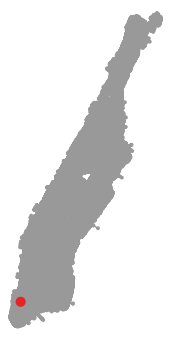

(<Figure size 273.909x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f28466d3c10>)

In [64]:
ox.plot_graph_route(G, [4143763628])

KeyError: 4207752452

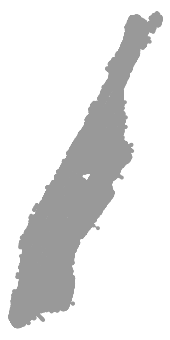

In [178]:
ox.plot_graph_route(G, [4207752452])

It is not possible to plot the second node. But when we reverse engineer the addresses that belong to the nodes, we find out that the addresses are definitely reachable: 

In [ ]:
addressm = pd.read_pickle("addressm.pkl")

In [88]:
an = addressm['Node'].tolist()
an.index(4143763628)

144

In [91]:
aa = addressm['Address'].tolist()
aa[144]

'255 Greenwich Street, New York City'

In [92]:
bn = addressm['Node'].tolist()
bn.index(4207752452)

55

In [93]:
bb = addressm['Address'].tolist()
bb[55]

'133 Morningside Avenue, New York City'